In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [47]:
path = '/Users/shrutikaushal/Desktop/Semester 3/Capstone/'

In [4]:
group_df = pd.read_excel(
    '/Users/shrutikaushal/Desktop/Semester 3/Capstone/data/cost_discharge_physpec_ippct.xlsx')

In [8]:
group_df.head()

,group,pat_cost,discharge_to_home_pct,phy_spec,IP_pct
0,ankle_fix,16741.5136,0.621714,ORTHOPEDIC SURGERY (ORS),0.542798
1,ant_cerv_fusion,18848.1697,0.846973,NEUROLOGICAL SURGERY (NS),0.575495
2,ant_tls_fusion,49478.1242,0.596666,ORTHOPEDIC SURGERY (ORS),0.983543
3,bariatric,14585.5550,0.945035,GENERAL SURGERY (GS),0.911311
4,breast reconstruction,13690.8043,0.929970,PLASTIC SURGERY (PS),0.246127


In [27]:
group_df.shape

(50, 5)

### Visualizing the numerical features

<IPython.core.display.Javascript object>


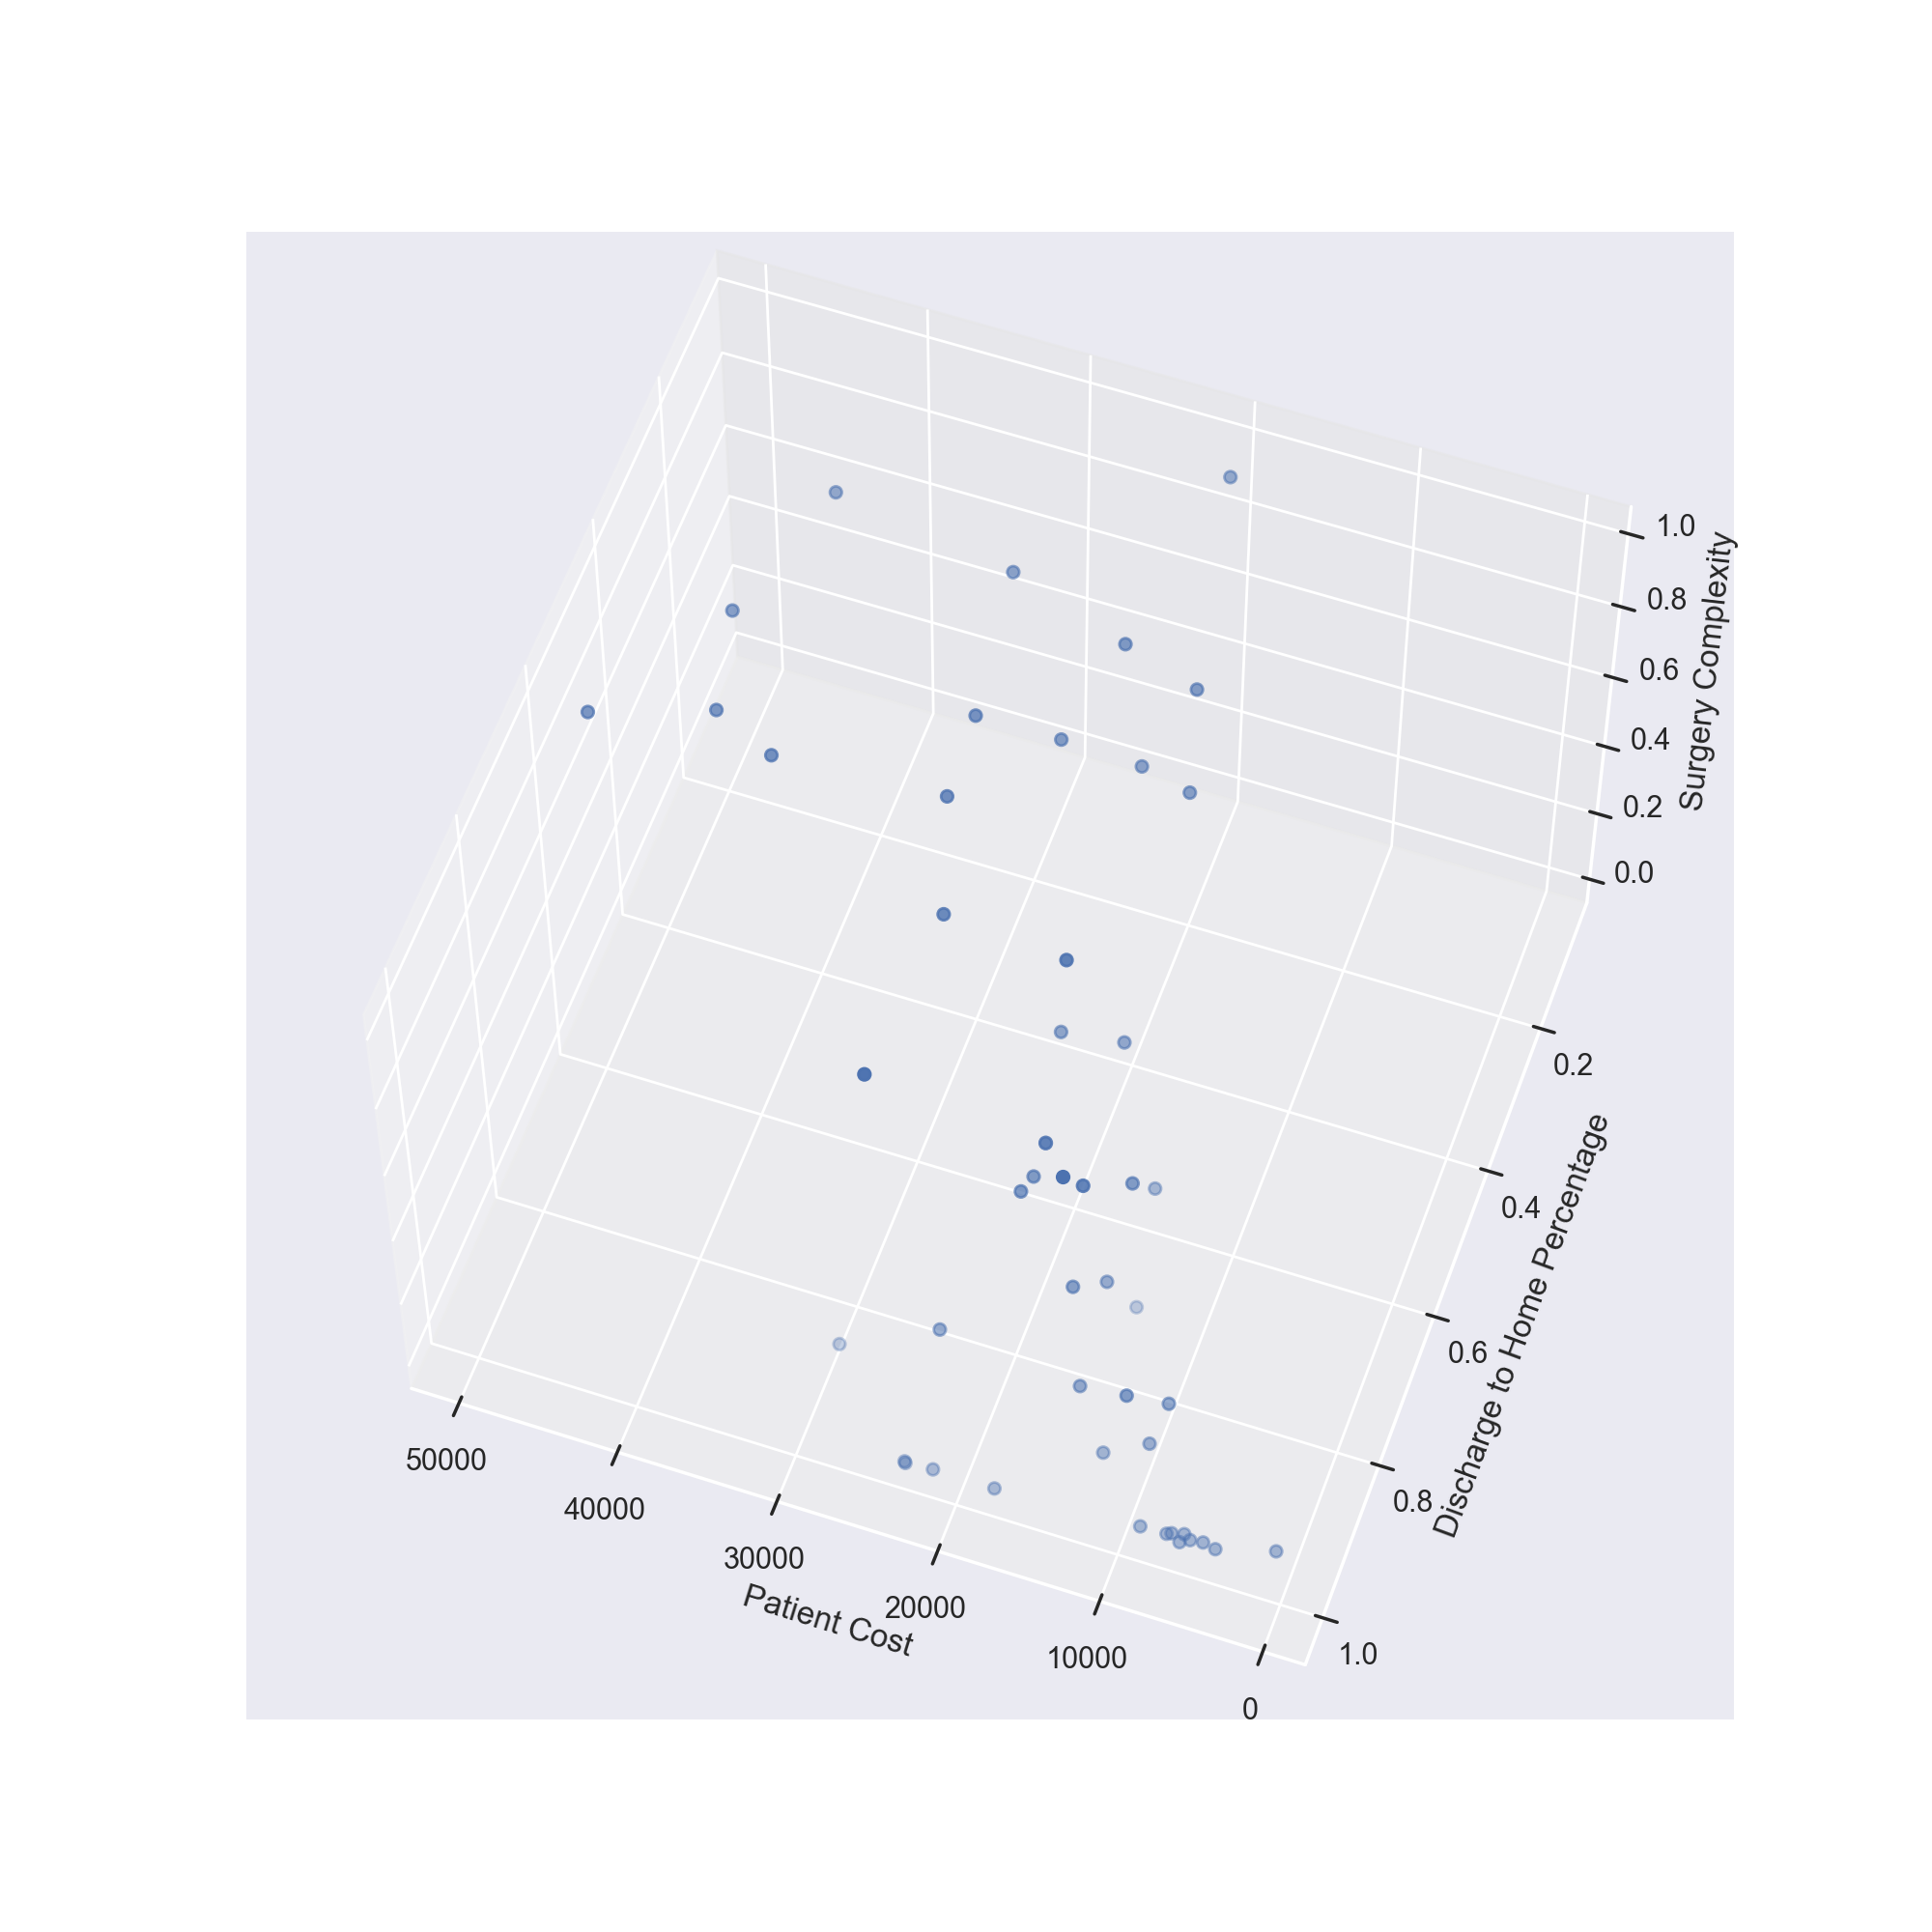

In [20]:
sns.set(style = "darkgrid")

%matplotlib notebook
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')

x = group_df['pat_cost']
y = group_df['discharge_to_home_pct']
z = group_df['IP_pct']

ax.set_xlabel("Patient Cost")
ax.set_ylabel("Discharge to Home Percentage")
ax.set_zlabel("Surgery Complexity")

ax.scatter(x, y, z)

plt.show()


### Performing preliminary clustering

#### K-MEANS

In [26]:
X = group_df[['pat_cost','discharge_to_home_pct','IP_pct']].values

In [28]:
# determining the optimal number of clusters
clusters = np.arange(1,10)
inertia = []
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(X)
    inertia.append(model.inertia_)

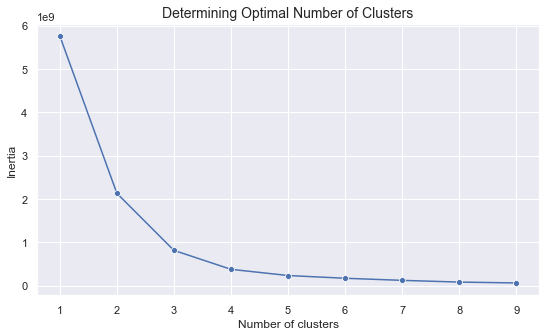

In [48]:
%matplotlib inline
plt.figure(figsize = (9,5))
sns.lineplot(x = clusters, y = inertia, marker = 'o')
plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('Inertia', fontsize = 12)
plt.title('Determining Optimal Number of Clusters', fontsize = 14)
plt.savefig(path+'figures/kmeans_optimal_clusters.png', bbox_inches = 'tight')
plt.show()

##### Optimal number of clusters = 3

In [49]:
optimal_model = KMeans(n_clusters = 3).fit_predict(X)

In [51]:
cluster_df = group_df.copy()
cluster_df['cluster'] = optimal_model

In [55]:
cluster_df.groupby(by = 'cluster').size()

cluster
0    21
1     5
2    24
dtype: int64

In [56]:
cluster_df[cluster_df.cluster == 1]

,group,pat_cost,discharge_to_home_pct,phy_spec,IP_pct,cluster
2,ant_tls_fusion,49478.1242,0.596666,ORTHOPEDIC SURGERY (ORS),0.983543,1
16,hepat,38551.9350,0.589055,GENERAL SURGERY (GS),0.994722,1
20,intracranial_thromb,41302.4483,0.247098,INTERNAL MEDICINE (IM),0.996995,1
33,post_cerv_fusion,44165.0556,0.423994,NEUROLOGICAL SURGERY (NS),0.984928,1
34,post_tls_fusion,42731.6593,0.546070,NEUROLOGICAL SURGERY (NS),0.975788,1


<IPython.core.display.Javascript object>


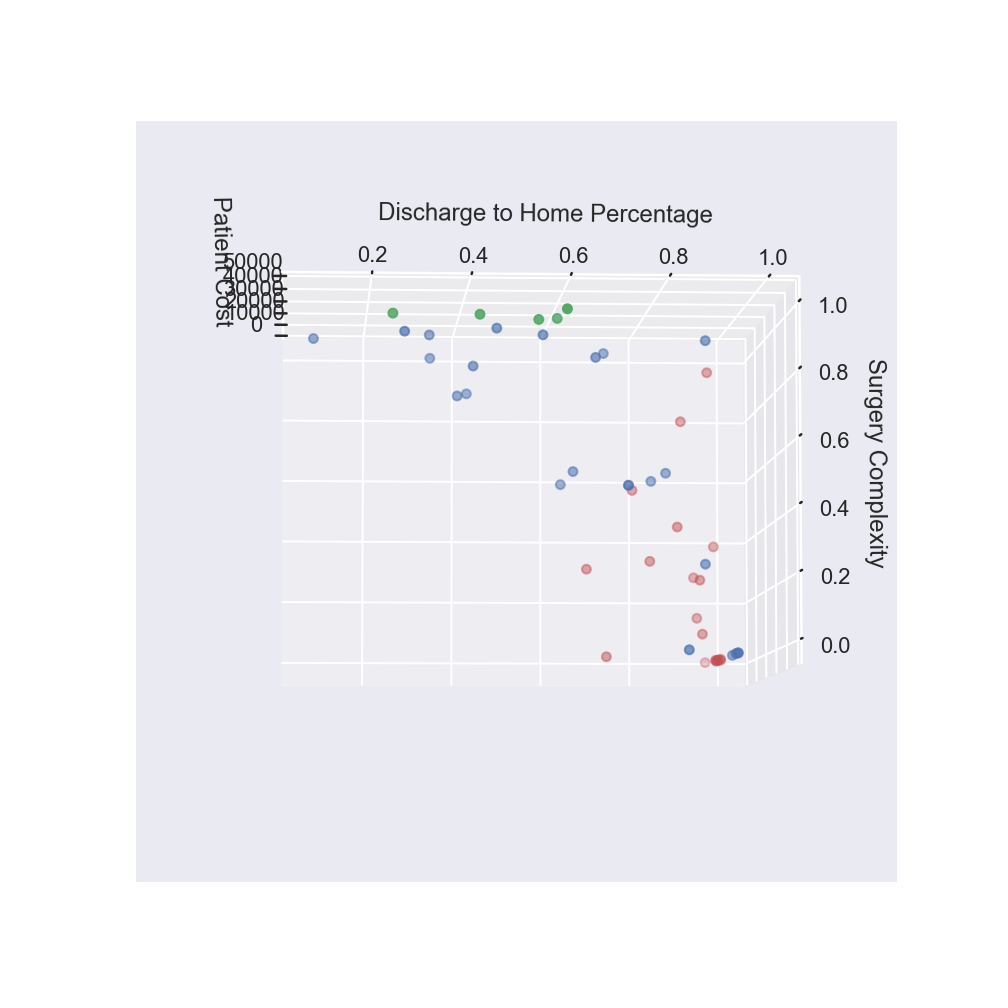

In [64]:
sns.set(style = "darkgrid")

%matplotlib notebook
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection = '3d')

x = cluster_df['pat_cost']
y = cluster_df['discharge_to_home_pct']
z = cluster_df['IP_pct']

col=cluster_df['cluster'].map({0:'r',1:'g',2:'b'})

ax.set_xlabel("Patient Cost")
ax.set_ylabel("Discharge to Home Percentage")
ax.set_zlabel("Surgery Complexity")

ax.scatter(x, y, z, color = col)

plt.show()